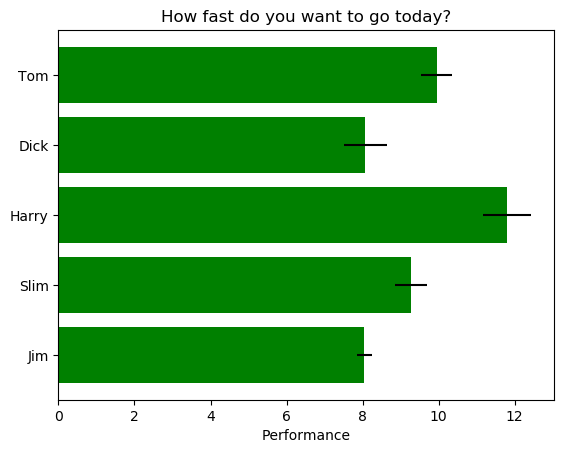

In [11]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

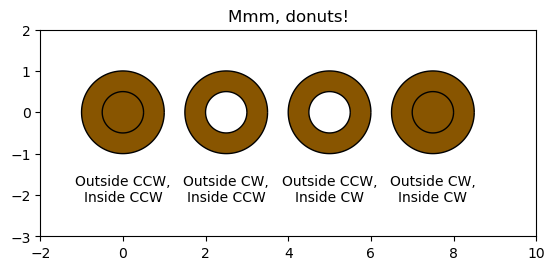

In [10]:

import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


def wise(v):
    if v == 1:
        return "CCW"
    else:
        return "CW"


def make_circle(r):
    t = np.arange(0, np.pi * 2.0, 0.01)
    t = t.reshape((len(t), 1))
    x = r * np.cos(t)
    y = r * np.sin(t)
    return np.hstack((x, y))

Path = mpath.Path

fig, ax = plt.subplots()

inside_vertices = make_circle(0.5)
outside_vertices = make_circle(1.0)
codes = np.ones(
    len(inside_vertices), dtype=mpath.Path.code_type) * mpath.Path.LINETO
codes[0] = mpath.Path.MOVETO

for i, (inside, outside) in enumerate(((1, 1), (1, -1), (-1, 1), (-1, -1))):
    # Concatenate the inside and outside subpaths together, changing their
    # order as needed
    vertices = np.concatenate((outside_vertices[::outside],
                               inside_vertices[::inside]))
    # Shift the path
    vertices[:, 0] += i * 2.5
    # The codes will be all "LINETO" commands, except for "MOVETO"s at the
    # beginning of each subpath
    all_codes = np.concatenate((codes, codes))
    # Create the Path object
    path = mpath.Path(vertices, all_codes)
    # Add plot it
    patch = mpatches.PathPatch(path, facecolor='#885500', edgecolor='black')
    ax.add_patch(patch)

    ax.annotate("Outside %s,\nInside %s" % (wise(outside), wise(inside)),
                (i * 2.5, -1.5), va="top", ha="center")

ax.set_xlim(-2, 10)
ax.set_ylim(-3, 2)
ax.set_title('Mmm, donuts!')
ax.set_aspect(1.0)
plt.show()

## test